In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset=pd.read_csv("CC GENERAL.csv")
X=dataset.iloc[:,1:]

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(X)
X=imputer.transform(X)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X);

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(X)

In [16]:
features=dataset.columns[1:]
# Get the PCA component loadings (correlation between original features and new components)
pca_components = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
# Display the component loadings
print(pca_components.T)
#each row represents an original feature
#each column represents either PC1 or PC2
#higher absolute values mean a feature contributes more to that component
#the sign +/- tells whether a feature increases or decreases the value of that principal component

                                       PC1       PC2
BALANCE                           0.101077  0.403957
BALANCE_FREQUENCY                 0.120043  0.130537
PURCHASES                         0.411642  0.041038
ONEOFF_PURCHASES                  0.346407  0.062872
INSTALLMENTS_PURCHASES            0.336814 -0.018533
CASH_ADVANCE                     -0.023343  0.439242
PURCHASES_FREQUENCY               0.321493 -0.190780
ONEOFF_PURCHASES_FREQUENCY        0.294633 -0.017924
PURCHASES_INSTALLMENTS_FREQUENCY  0.274710 -0.178601
CASH_ADVANCE_FREQUENCY           -0.089139  0.434082
CASH_ADVANCE_TRX                 -0.048654  0.419734
PURCHASES_TRX                     0.390695 -0.019394
CREDIT_LIMIT                      0.211663  0.238678
PAYMENTS                          0.266249  0.257476
MINIMUM_PAYMENTS                  0.060351  0.166970
PRC_FULL_PAYMENT                  0.132112 -0.190026
TENURE                            0.081021 -0.004326


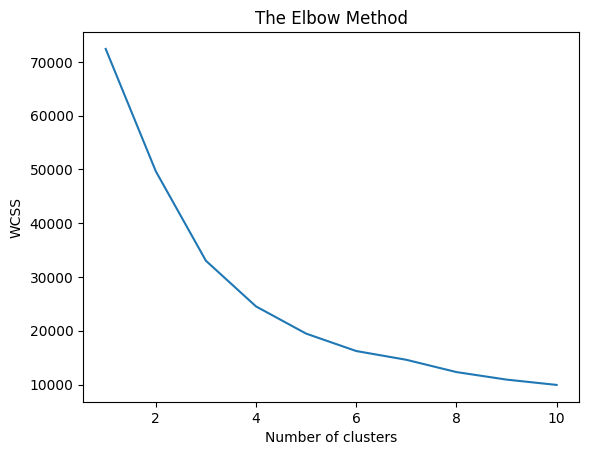

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [19]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

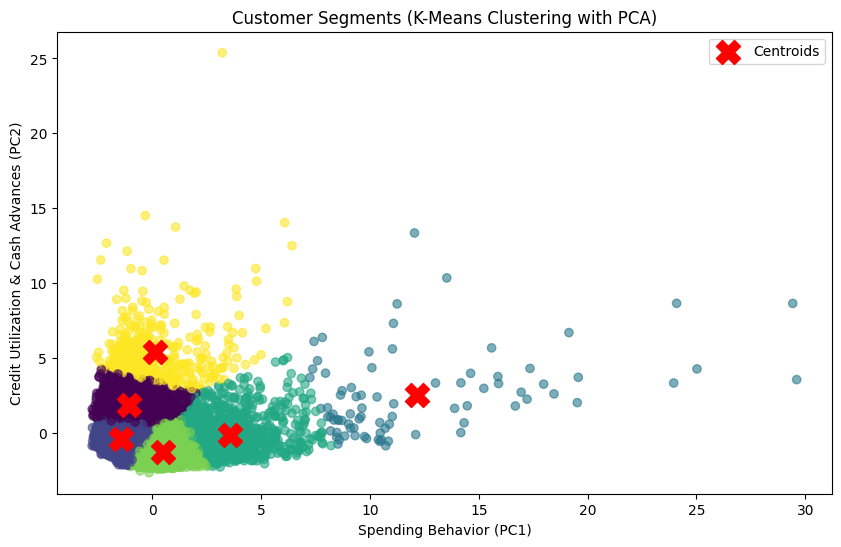

In [20]:
import matplotlib.pyplot as plt
# Get cluster labels assigned by KMeans
clusters = kmeans.labels_
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.6)
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label="Centroids")
# Add labels and title
plt.title("Customer Segments (K-Means Clustering with PCA)")
plt.xlabel("Spending Behavior (PC1)")
plt.ylabel("Credit Utilization & Cash Advances (PC2)")
plt.legend()
plt.show()


In [ ]:
'''
Based on this customer segmentation, here are key business insights you could derive:

Yellow Cluster (High Credit Utilization, Moderate Spending):

These customers rely heavily on credit and cash advances while maintaining moderate spending
Potential opportunity for credit counseling services or balance transfer offers
Risk management focus as they may be more likely to experience financial stress
Consider debt consolidation products or lower-interest options


Purple Cluster (Low Spending, Low Credit Utilization):

Conservative financial behavior suggests risk-averse customers
Opportunity to encourage increased card usage through loyalty programs or cashback incentives
May respond well to security features and financial planning tools
Potential to cross-sell savings products or low-risk investments


Green Cluster (Slightly Higher Spending, Low Credit Utilization):

Financially stable customers who use credit responsibly
Strong potential for premium card upgrades or credit limit increases
Ideal targets for lifestyle products and experiential rewards
May respond well to exclusive membership perks


Teal/Turquoise Cluster (Mid-Range Spending, Variable Credit Utilization):

Diverse spending behaviors suggest varying financial needs
Opportunity for personalized offers based on specific spending patterns
Consider targeted category-specific rewards aligned with their spending habits
May benefit from specialized cards (travel, dining, etc.)


Blue Cluster (Highest Spending, Varied Credit Utilization):

High-value customers with significant spending power
Prime candidates for premium/luxury products and concierge services
Focus on retention through exceptional customer service and exclusive benefits
May respond well to status-oriented rewards and recognition



Strategic Recommendations:

Develop targeted marketing campaigns for each segment
Design specialized product offerings that address each cluster's behaviors
Implement differentiated customer service approaches based on segment value
Create risk management strategies for the yellow cluster
Focus retention efforts on blue and teal clusters
'''